In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Consistent style for all our plots (because we are professionals)
sns.set_style("whitegrid")
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:

# Load the data from the provided CSV file into a pandas DataFrame.
try:
    df = pd.read_csv('../data/cleaned_data.csv')
    print("\nData successfully loaded. Here's a preview:")
    display(df.head())
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found. Please make sure the file is in the correct directory.")


Data successfully loaded. Here's a preview:


,Unnamed: 0,Transaction_ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,1,24/11/23,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,1,2,27/2/23,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,2,3,13/1/23,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,5,21/5/23,CUST005,Male,37.0,Clothing,1.0,500.0,500.0
4,5,6,6/5/23,CUST006,Male,30.0,Beauty,2.0,50.0,100.0



--- Step 1: Finding the Optimal Number of Clusters ---


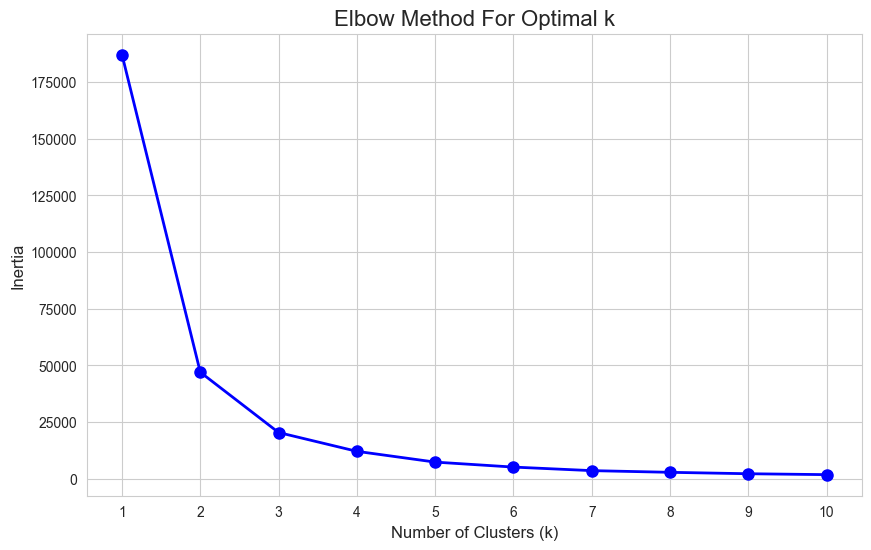

The elbow graph clearly indicates that k=4 is the optimal number of clusters.


In [3]:
# Determine the Optimal Number of Clusters with the Elbow Method
#
# Before we decide on the number of clusters, we'll use the Elbow Method to
# programmatically find the best value for 'k'. We look for the "elbow"

print("\n--- Step 1: Finding the Optimal Number of Clusters ---")
age_data = df[['Age']]
inertia = []
K = range(1, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(age_data)
    inertia.append(kmeans_model.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=16)
plt.xticks(K)
plt.show()
print("The elbow graph clearly indicates that k=4 is the optimal number of clusters.")

In [4]:
# Perform K-Means Clustering with k=4
# -------------------------------------------
# Now that we've confirmed k=4 is a good choice, we will perform the clustering.
# A new 'AgeCluster' column will be added to our DataFrame to store the cluster ID for each person.
print("\n--- Step 2: Performing K-Means Clustering ---")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['AgeCluster'] = kmeans.fit_predict(age_data)
print("Clustering complete. 'AgeCluster' column added.")
display(df[['Age', 'AgeCluster']].head())


--- Step 2: Performing K-Means Clustering ---
Clustering complete. 'AgeCluster' column added.


,Age,AgeCluster
0,34.0,1
1,26.0,3
2,50.0,2
3,37.0,1
4,30.0,1



--- Step 3: Visualizing Cluster Assignments ---


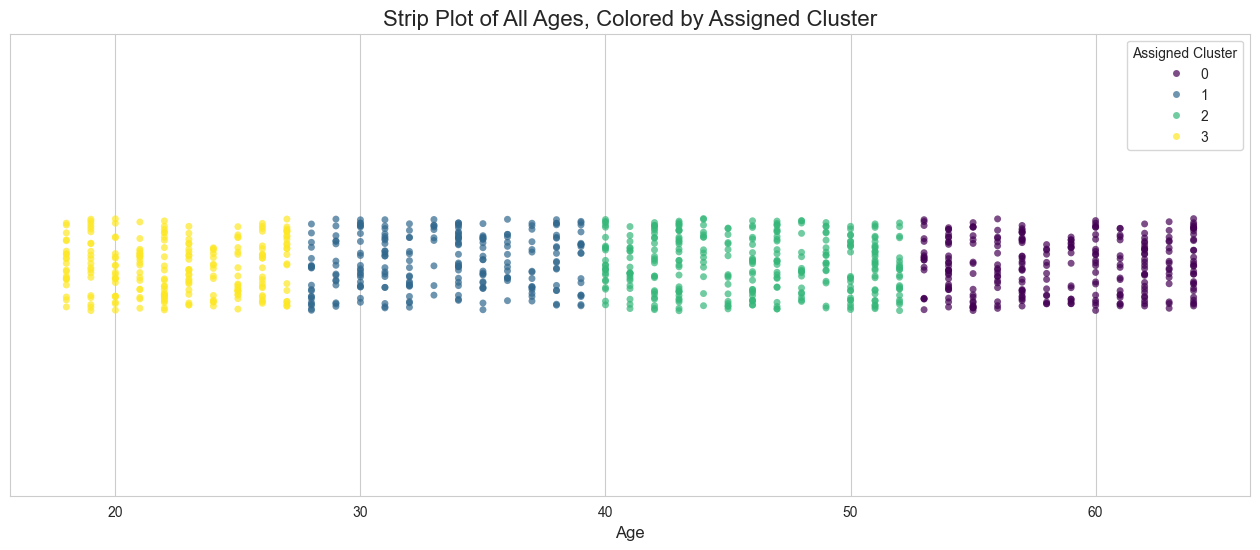

In [5]:
# Visualize the Data Distribution -> Colored Strip Plot
# This plot shows every single person in the dataset as a point, arranged by age.
# The points are colored based on the cluster they were assigned to, showing how the algorithm has grouped the data.
print("\n--- Step 3: Visualizing Cluster Assignments ---")
plt.figure(figsize=(16, 6))
sns.stripplot(
    data=df,
    x='Age',
    hue='AgeCluster',
    palette='viridis',
    jitter=True,
    alpha=0.7,
    s=5
)
plt.title('Strip Plot of All Ages, Colored by Assigned Cluster', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('')
plt.yticks([])
plt.legend(title='Assigned Cluster')
plt.show()



--- Step 4: Analyzing Cluster Sizes ---
Number of people per cluster:
AgeCluster
0    261
1    228
2    297
3    214
Name: count, dtype: int64


C:\Users\spide\AppData\Local\Temp\ipykernel_28208\3993429747.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AgeCluster', palette='viridis')


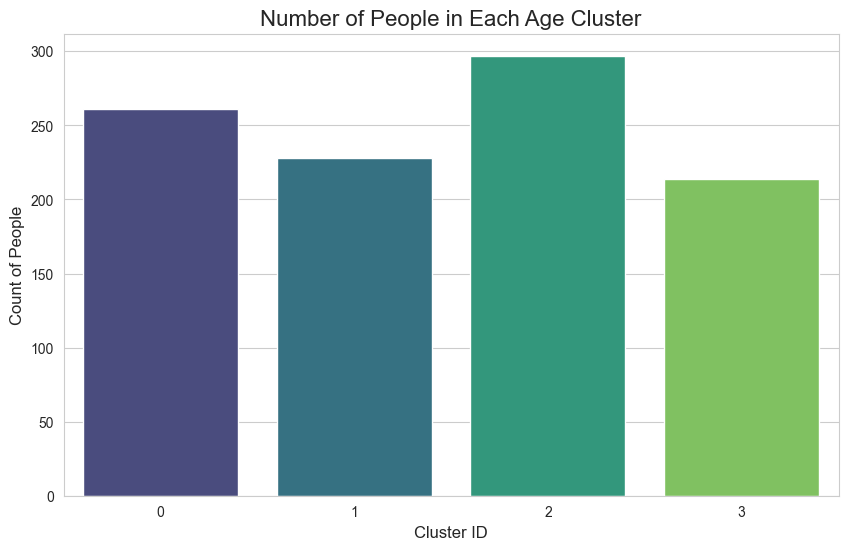

In [6]:
# Analyze and Visualize Cluster Sizes
# Let's count how many people fall into each cluster to understand the group sizes.
print("\n--- Step 4: Analyzing Cluster Sizes ---")
cluster_counts = df['AgeCluster'].value_counts().sort_index()
print("Number of people per cluster:")
print(cluster_counts)

# Visualize the counts with a bar plot for easy comparison.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeCluster', palette='viridis')
plt.title('Number of People in Each Age Cluster', fontsize=16)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.show()

In [7]:
# Create Meaningful Age Group Labels
#  We will create labels (e.g., "18-29") based on the age ranges of the clusters.
# This is done by finding the midpoint between the average age of each cluster.
print("\n--- Step 5: Creating Meaningful Age Group Labels ---")

# 1. Get the cluster centers (mean age for each cluster) and sort them.
centers = sorted(kmeans.cluster_centers_.flatten())
print(f"Cluster centers (mean ages): {np.round(centers, 2)}")

# 2. Calculate midpoints to define the boundaries of our age groups.
midpoints = [(centers[i] + centers[i+1]) / 2 for i in range(len(centers)-1)]
print(f"Midpoints for age bins: {np.round(midpoints, 2)}")

# 3. Define the bins using the midpoints.
max_age = df['Age'].max()
bins = [0] + midpoints + [max_age + 1]
labels = [f"{int(round(bins[i]))}-{int(round(bins[i+1]))-1}" for i in range(len(bins)-1)]
print(f"Generated age group labels: {labels}")

# 4. Create the new 'AgeGroup' column using the bins and labels.
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print("\nFinal DataFrame with 'AgeGroup' column:")
display(df[['Age', 'AgeCluster', 'AgeGroup']].head())


--- Step 5: Creating Meaningful Age Group Labels ---
Cluster centers (mean ages): [22.5  33.38 46.   58.64]
Midpoints for age bins: [27.94 39.69 52.32]
Generated age group labels: ['0-27', '28-39', '40-51', '52-64']

Final DataFrame with 'AgeGroup' column:


,Age,AgeCluster,AgeGroup
0,34.0,1,28-39
1,26.0,3,0-27
2,50.0,2,40-51
3,37.0,1,28-39
4,30.0,1,28-39


In [8]:
# Finally the analysis of Labeled Age Groups
# let's see the distribution of our new age groups.
print("\n--- Step 6: Final Analysis of Labeled Groups ---")

age_group_counts = df['AgeGroup'].value_counts().sort_index()
print("Final count per labeled age group:")
print(age_group_counts)


--- Step 6: Final Analysis of Labeled Groups ---
Final count per labeled age group:
AgeGroup
0-27     214
28-39    228
40-51    297
52-64    261
Name: count, dtype: int64


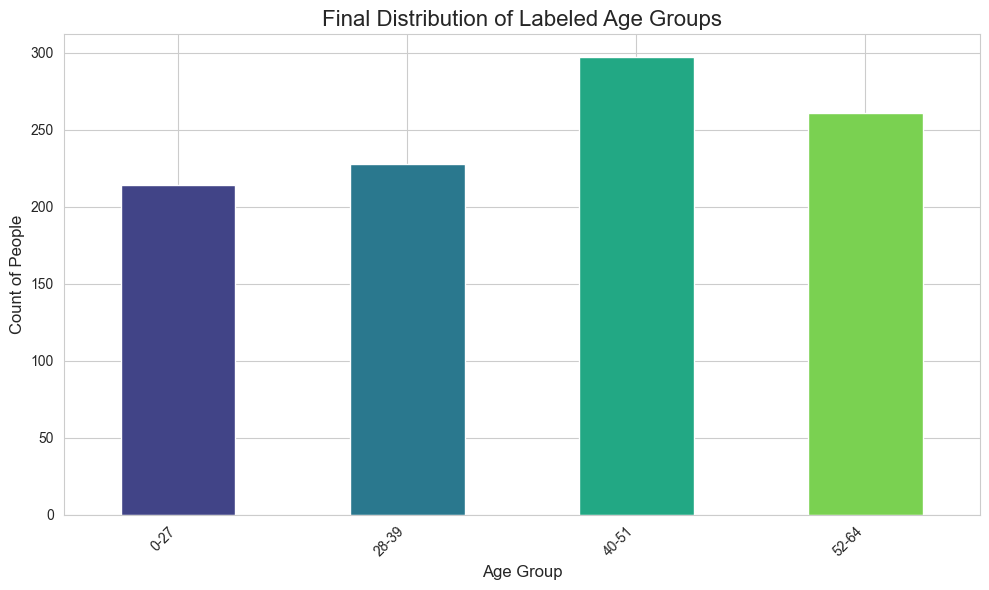

In [9]:
# Visualize the final distribution.
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color=sns.color_palette('viridis', 4))
plt.title('Final Distribution of Labeled Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


How we have concluded into these "bins" for the age group?
1. First, the K-Means algorithm looks at all the ages in your dataset and identifies 4 "centers of gravity," or
clusters. The algorithm's only goal is to create groups where the ages within each group are as similar as possible. The strip plot visualizes these four distinct groups that the algorithm found, shown in different colors.
2. Once the groups are formed, the code calculates the average age for each cluster. These are the Cluster centers
(mean ages). For our data, these centers are approximately: 22.1, 33.5, 45.9 and 58.6.
3. Then the boundaries, to create the bins, the code calculates the midpoint, between each pair of cluster centers:

The boundary between the first and second group is the midpoint of 22.1 and 33.5, which is about 27.8.
The boundary between the second and third group is the midpoint of 33.5 and 45.9, which is about 39.7.
The boundary between the third and fourth group is the midpoint of 45.9 and 58.6, which is about 52.2.

4. These midpoints are then used to create the final bins. After rounding, we get the age groups:

18-27: Everyone from age 18 up to the first boundary (27.8).
28-39: Everyone between the first and second boundaries (27.8 to 39.7).
40-51: Everyone between the second and third boundaries (39.7 to 52.2).
52-64: Everyone above the last boundary (52.2).